In [3]:
# 다변량 데이터의 경우, 모든 특성들의 데이터 스케일을 맞춰야 한다
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()   # 데이터 셋 로드
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1
)

# shape
print(X_train.shape, X_test.shape)


(426, 30) (143, 30)


In [7]:
# Scaler의 적용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # 최솟값 0, 최댓값 1 사이의 데이터로 반환
scaler.fit(X_train)      # 비지도 학습 -> target 없음

X_train_scaled = scaler.transform(X_train)  # 스케일 변환
X_train_scaled

array([[0.389938  , 0.70713561, 0.4119273 , ..., 0.80962199, 0.59957224,
        0.91755006],
       [0.37763264, 0.31755157, 0.36790823, ..., 0.51168385, 0.33174905,
        0.31598672],
       [0.36438071, 0.35238417, 0.35208348, ..., 0.55292096, 0.3476711 ,
        0.28857479],
       ...,
       [0.48364807, 0.50084545, 0.48655933, ..., 0.65257732, 0.4151616 ,
        0.84259557],
       [0.3336173 , 0.3902604 , 0.31787713, ..., 0.27364261, 0.15684411,
        0.22443516],
       [0.28628899, 0.29455529, 0.26826066, ..., 0.17226804, 0.10004753,
        0.06938644]])

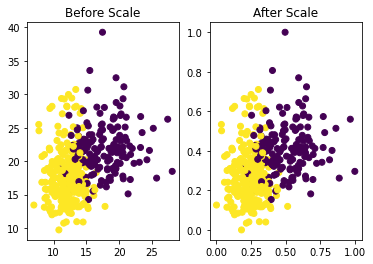

In [10]:
# 데이터의 시각화
import matplotlib.pyplot as plt

plt.subplot(121)  # 1 * 2 서브플롯 중, 1번째 영역
plt.scatter(X_train[:, 0],
           X_train[:, 1],
           c=y_train)
plt.title("Before Scale")
print("")

plt.subplot(122)  # 1 * 2 서브플롯 중, 2번째 영역 (조정된 데이터)
plt.scatter(X_train_scaled[:, 0],
           X_train_scaled[:, 1],
           c=y_train)
plt.title("After Scale")
plt.show()

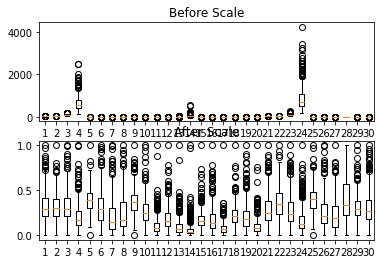

In [13]:
# 모든 feature의 스케일을 시각화
# 원본 데이터
plt.subplot(211)  # 2 * 1 서브플롯 중, 1번째 영역(원복)
plt.boxplot(X_train)
plt.title("Before Scale")
print("")

plt.subplot(212)  # 2 * 1 서브플롯 중, 2번째 영역(스케일 된 데이터)
plt.boxplot(X_train_scaled)
plt.title("After Scale")
plt.show()

In [16]:
# 원본 데이터를 활용한 SVC 분류
from sklearn.svm import SVC

svm = SVC(C=100)  # 모델 생성
svm.fit(X_train, y_train)
print("테스트 세트 정확도:", svm.score(X_test, y_test))

테스트 세트 정확도: 0.9370629370629371


In [19]:
# 스케일 조정된 데이터를 활용한 SVC 분류
# 중요: 학습 데이터와 테스트 데이터에 같은 스케일을 적용해 주어야 한다
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("조정된 테스트 세트의 정확도:", svm.score(X_test_scaled, y_test))

조정된 테스트 세트의 정확도: 0.972027972027972
